In [1]:
from IPython.display import Image
from wordcloud import WordCloud
from konlpy.tag import Okt
from konlpy import data
from collections import Counter
import os

In [2]:
nlp = Okt()

In [3]:
sample ="""개봉했을때부터 지금까지 마음이 답답하거나 힘들때
이영화 보고있어요 그때마다 심적인 위로를 받을수있는 영화같아요
장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다.
알잘딱깔센 위쑤시개 얼죽아"""

# 명사들만 추출 -> 리스트형식으로 반환
nouns = nlp.nouns(sample)
print(nouns)

['개봉', '때', '지금', '마음', '때', '이영화', '그때', '심', '위로', '영화', '장면', '하나', '하나', '마음', '남아', '여운', '영화', '알잘딱깔센', '위쑤시개', '얼죽아']


In [4]:
for p in data.path:
    path = os.path.abspath(p)
    print(path, "-->", os.path.exists(path))

C:\Users\itwill\konlpy_data --> False
C:\konlpy_data --> False
D:\konlpy_data --> False
E:\konlpy_data --> False
c:\Users\itwill\AppData\Local\Programs\Python\Python313\konlpy_data --> False
c:\Users\itwill\AppData\Local\Programs\Python\Python313\lib\konlpy_data --> False
C:\Users\itwill\AppData\Roaming\konlpy_data --> False
C:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\konlpy\data --> True


In [5]:
with open("wordcloud/대한민국헌법.txt", "r", encoding="utf-8")as f:
    text = f.read()

In [6]:
nlp = Okt()
nouns = nlp.nouns(text)

In [7]:
with open("wordcloud/stopwords-ko.txt", "r", encoding="utf-8")as f:
    stopwords = f.readlines()
    for i,v in enumerate(stopwords):
        stopwords[i] = v.strip()
        

In [10]:
data_set = []
for v in nouns:
    if v not in stopwords:
        data_set.append(v)

In [12]:
count = Counter(data_set)
count

Counter({'법률': 127,
         '정': 89,
         '수': 88,
         '대통령': 83,
         '국가': 73,
         '국회': 68,
         '국민': 61,
         '관': 58,
         '헌법': 53,
         '모든': 37,
         '바': 37,
         '위': 36,
         '사항': 23,
         '권리': 21,
         '안': 21,
         '의원': 21,
         '자유': 20,
         '정부': 20,
         '선거': 20,
         '임명': 20,
         '직무': 19,
         '국무총리': 19,
         '경제': 18,
         '의무': 18,
         '조직': 18,
         '국회의원': 18,
         '임기': 18,
         '의결': 17,
         '공무원': 17,
         '경우': 17,
         '국무위원': 17,
         '대법원': 17,
         '범위': 16,
         '장': 15,
         '법관': 15,
         '보호': 14,
         '정책': 14,
         '정당': 14,
         '헌법재판소': 14,
         '재적': 14,
         '회의': 14,
         '항의': 14,
         '관리': 14,
         '노력': 13,
         '보장': 13,
         '거나': 13,
         '요구': 13,
         '법원': 12,
         '집회': 12,
         '과반수': 12,
         '출석': 12,
         '찬성': 12,
     

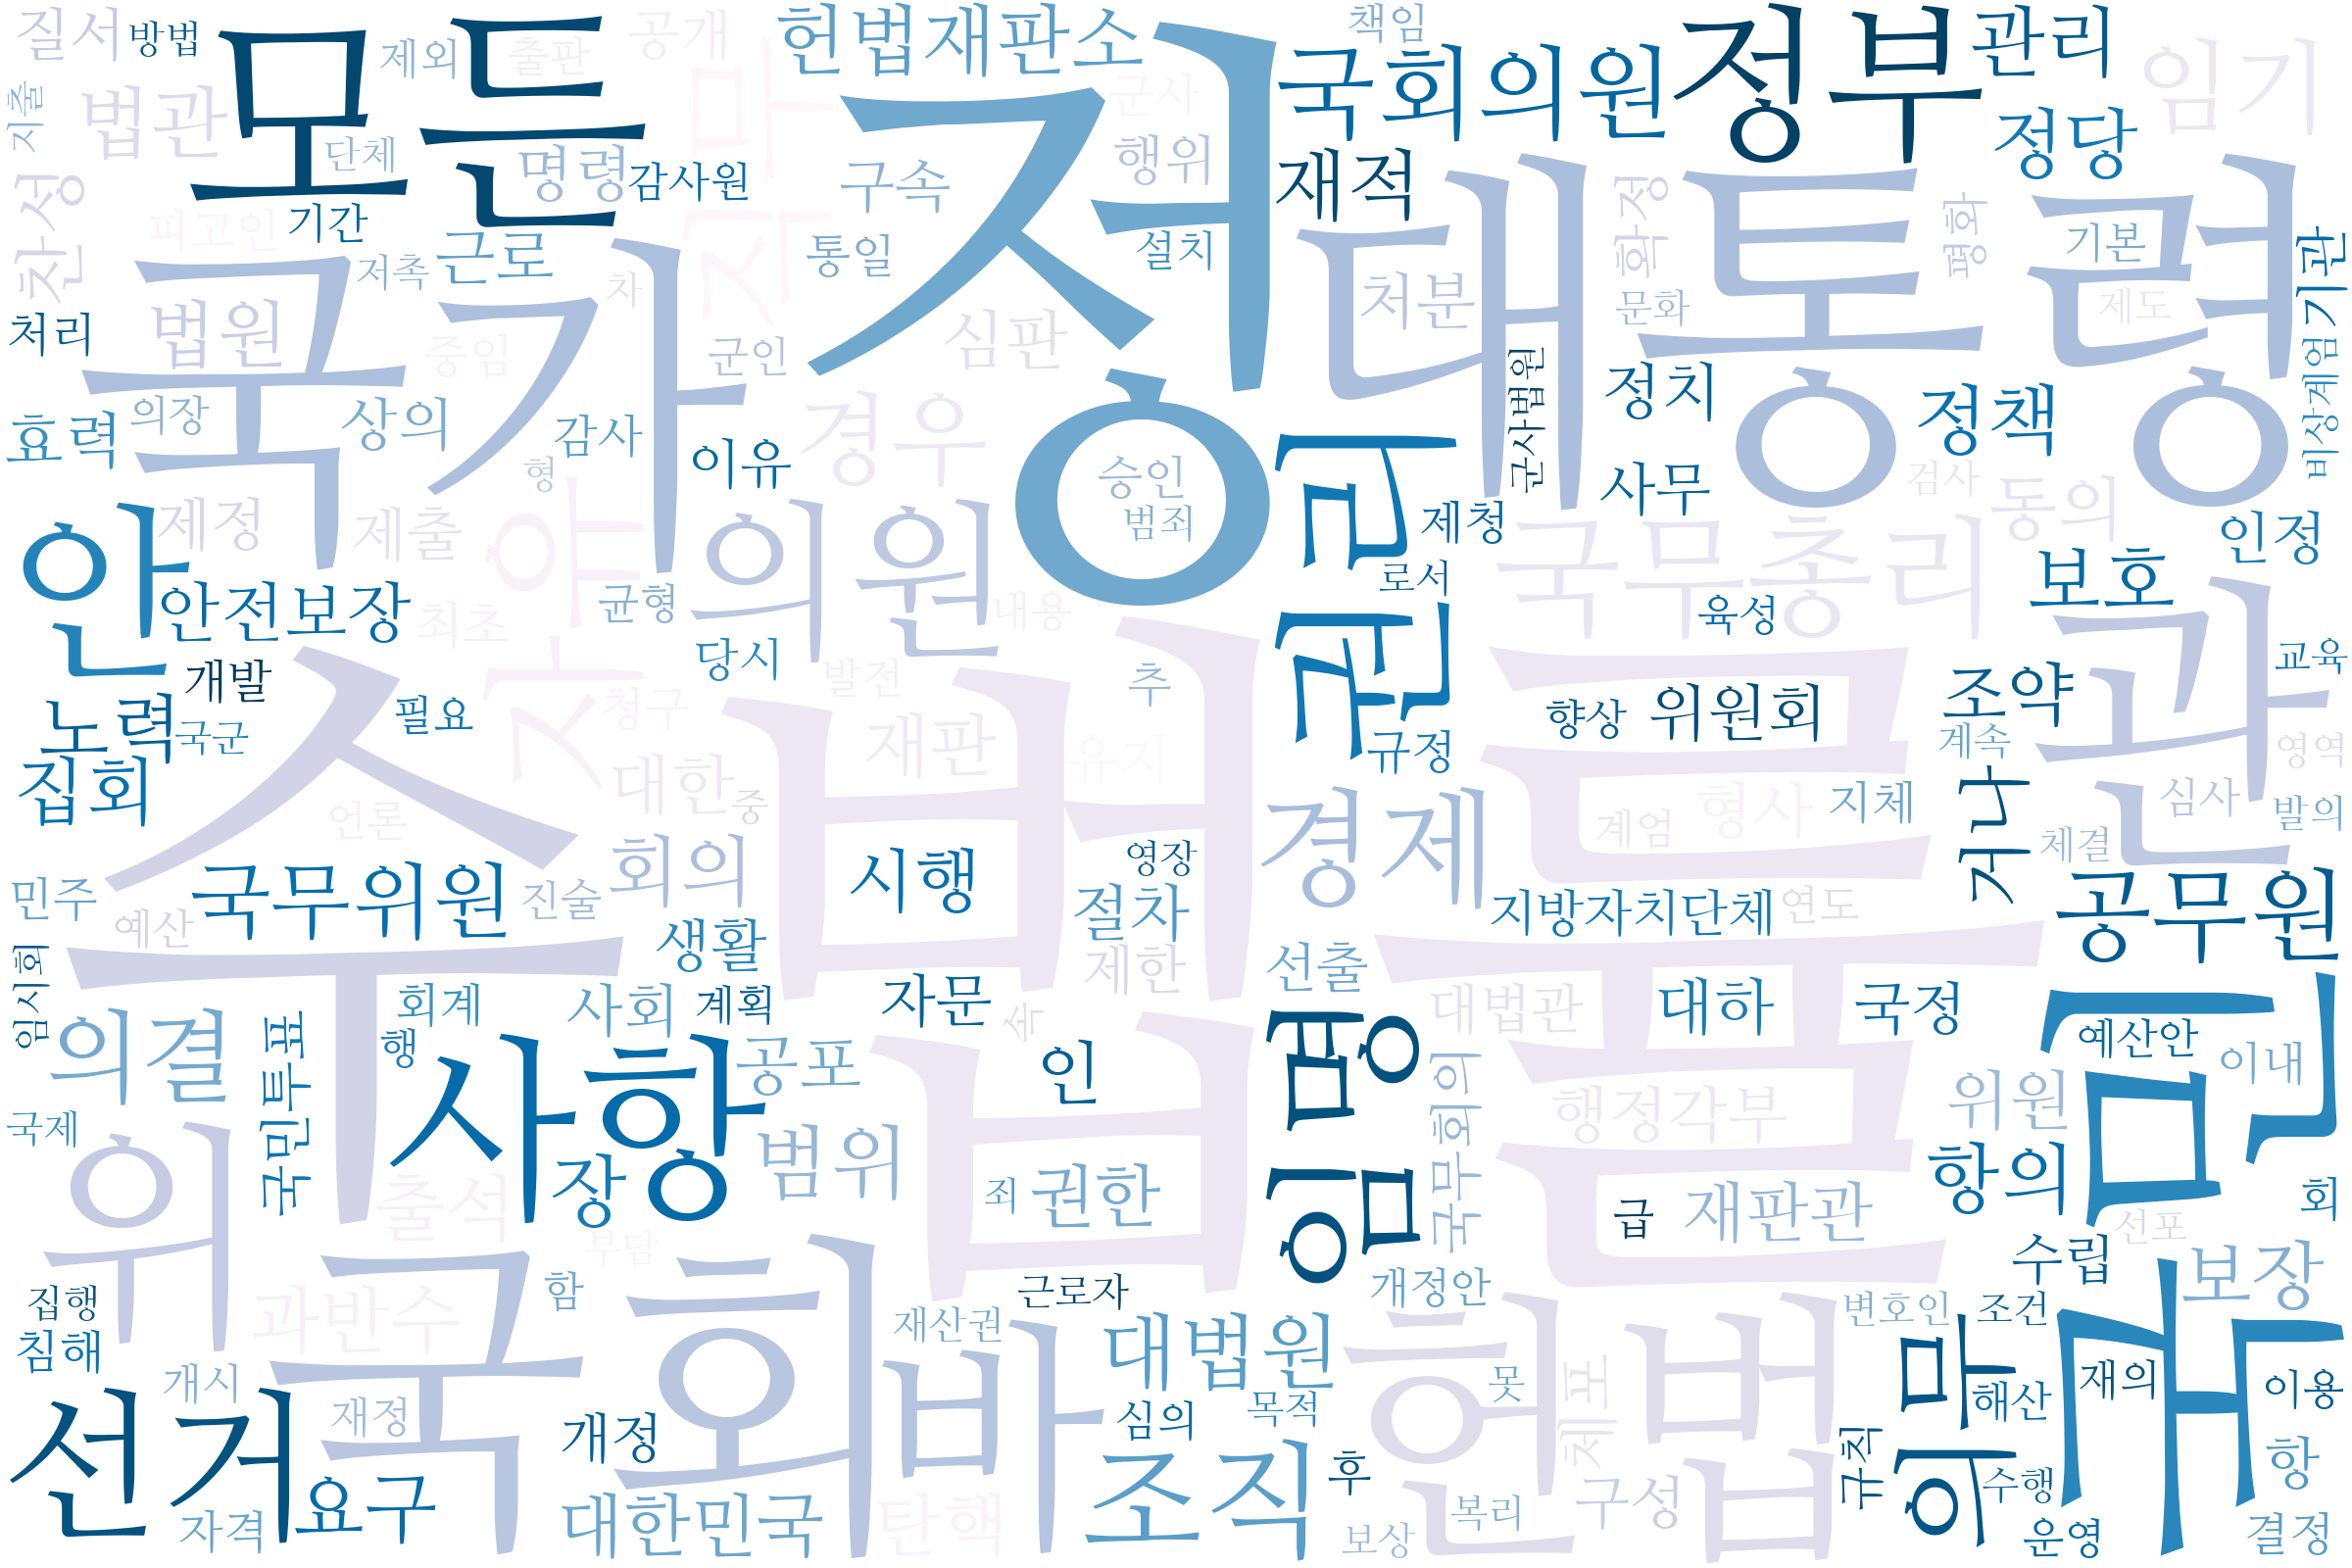

In [14]:
wc = WordCloud(
    font_path ="./wordcloud/NanumMyeongjo.ttf",
    width=1200,
    height=800,
    scale=2.0,
    background_color="#ffffff",
    colormap="PuBu",
)

wc = wc.generate_from_frequencies(count)
wc.to_file("대한민국헌법-주요단어.png")
Image(filename="대한민국헌법-주요단어.png")